In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline
pd.set_option('display.max_columns', None)

 
df = pd.read_excel('EUR.xlsx') # read the dataset from Bloomberg terminal
df.columns=df.columns.map(lambda x: x.strip())# remove the extra space in the column names 
df.columns
 
print("Column headings:") # print out all the columns to see which features we selected for the model 
print(df.columns)

Column headings:
Index(['Date', 'EUR % change', 'PTPS(0.02)', 'SMAVG (5)  on Close',
       'TE UB(20,2)', 'TE LB(20,2)', 'UBB(2)', 'BollMA (20)  on Close',
       'LBB(2)', 'Conv(9)', 'Base(26)', 'Osc(5,15) (EUR BGN)',
       'RSI (14)  on Close (EUR BGN)', '%DS(5)', '%DSS(3)',
       'WLPR(14) (EUR BGN)', 'BollW (EUR BGN)', '%B (EUR BGN)',
       'CMCI(13) (EUR BGN)', 'plusDMI(14)', 'minusDMI', 'ADX', 'MACD(12,26)',
       'Sig(9)', 'Diff', 'UBB(2).1', 'BollMA (20)  on Close.1', 'LBB(2).1',
       'Moving Average(13)', 'KLTN UB(10,100)', 'KLTN MA(10)',
       'KLTN LB(10,100)', 'Moving Average(6,14)', 'Upper STARC Band(2)',
       'Lower STARC Band(2)', 'Upper Band(HLCAverage,20)',
       'Average(HLCAverage,20)', 'Lower Band(HLCAverage,20)', 'Upper Band',
       'Lower Band', 'BollW (EUR BGN).1', '%B (EUR BGN).1', 'MACD(12,26).1',
       'Difference', 'Hurst(25) (EUR BGN)', 'STARC Bandwidth (EUR BGN)',
       'STARC%B (EUR BGN)', 'CCI(HLCAverage,20) (EUR BGN)', 'ADX ROC(5)',
       

,Date,EUR % change,PTPS(0.02),SMAVG (5) on Close,"TE UB(20,2)","TE LB(20,2)",UBB(2),BollMA (20) on Close,LBB(2),Conv(9),Base(26),"Osc(5,15) (EUR BGN)",RSI (14) on Close (EUR BGN),%DS(5),%DSS(3),WLPR(14) (EUR BGN),BollW (EUR BGN),%B (EUR BGN),CMCI(13) (EUR BGN),plusDMI(14),minusDMI,ADX,"MACD(12,26)",Sig(9),Diff,UBB(2).1,BollMA (20) on Close.1,LBB(2).1,Moving Average(13),"KLTN UB(10,100)",KLTN MA(10),"KLTN LB(10,100)","Moving Average(6,14)",Upper STARC Band(2),Lower STARC Band(2),"Upper Band(HLCAverage,20)","Average(HLCAverage,20)","Lower Band(HLCAverage,20)",Upper Band,Lower Band,BollW (EUR BGN).1,%B (EUR BGN).1,"MACD(12,26).1",Difference,Hurst(25) (EUR BGN),STARC Bandwidth (EUR BGN),STARC%B (EUR BGN),"CCI(HLCAverage,20) (EUR BGN)",ADX ROC(5),ADX MA(5),AUD BGN Curncy,GBP BGN Curncy,CAD BGN Curncy,JPY BGN Curncy,SPX Index,CCMP Index,DJI Index,SX5E Index,UKX Index,TPX Index,CL1 COMB Comdty,XAU BGN Curncy,USGG2YR Index,USGG10YR Index
0,2018-10-26,-0.964044,1.1815,1.1521,1.1796,1.1398,1.1796,1.1597,1.1398,1.1575,1.1720,-0.0049,37.4427,42.7650,41.2936,-80.1556,3.4324,0.0136,-118.1180,15.2706,24.0550,20.1767,-0.0100,-0.0098,-0.0002,1.1796,1.1597,1.1398,1.1574,1.177,1.1581,1.1392,1.1559,1.1939,1.1179,1.1788,1.1599,1.1410,1.1588,1.1231,3.4324,0.0136,-0.0100,-0.0002,0.5619,0.0759,29.4599,-147.8105,-11.8912,-20.5121,1.4104,0.7795,1.3106,111.91,2658.69,7167.212,24688.31,3134.89,6939.56,1596.01,67.59,1233.53,2.8062,3.0755
1,2018-10-19,-0.397924,1.1369,1.1590,1.1807,1.1423,1.1807,1.1615,1.1423,1.1604,1.1797,0.0001,41.4371,42.6012,38.0307,-58.5603,3.2996,0.2367,-53.9887,16.6099,22.1894,20.0105,-0.0091,-0.0098,0.0006,1.1807,1.1615,1.1423,1.1602,1.176,1.1577,1.1395,1.1596,1.1968,1.1224,1.1803,1.1615,1.1428,1.1625,1.1265,3.2996,0.2367,-0.0091,0.0006,0.6037,0.0745,38.9879,-86.7666,-19.3292,-22.6456,1.4047,0.7648,1.3104,112.55,2767.78,7449.026,25444.34,3210.82,7049.80,1692.85,69.12,1226.49,2.9038,3.1921
2,2018-10-12,0.312392,1.1351,1.1612,1.1809,1.1435,1.1809,1.1622,1.1435,1.1558,1.1858,0.0008,43.2110,38.5148,33.0081,-49.6108,3.2130,0.3336,-53.0799,17.4389,23.8992,20.4436,-0.0090,-0.0099,0.0009,1.1809,1.1622,1.1435,1.1617,1.176,1.1573,1.1385,1.1603,1.1974,1.1231,1.1810,1.1621,1.1432,1.1666,1.1300,3.2130,0.3336,-0.0090,0.0009,0.7113,0.0744,44.2838,-87.9978,-22.1292,-21.3498,1.4057,0.7603,1.3024,112.21,2767.13,7496.894,25339.99,3194.41,6995.91,1702.45,71.34,1217.05,2.8528,3.1613
3,2018-10-05,-0.689417,1.1331,1.1611,1.1812,1.1442,1.1812,1.1627,1.1442,1.1558,1.1858,-0.0002,41.3875,32.9763,27.5567,-56.6147,3.1799,0.2222,-59.6907,18.7062,24.3296,20.8140,-0.0092,-0.0102,0.0009,1.1812,1.1627,1.1442,1.1627,1.177,1.1582,1.1393,1.1610,1.1984,1.1235,1.1819,1.1630,1.1440,1.1696,1.1326,3.1799,0.2222,-0.0092,0.0009,0.8564,0.0748,38.5749,-95.6542,-23.7152,-17.8805,1.4180,0.7622,1.2939,113.72,2885.57,7788.447,26447.05,3345.51,7318.54,1792.65,74.34,1203.63,2.8850,3.2328
4,2018-09-28,-1.234148,1.1311,1.1627,1.1828,1.1450,1.1828,1.1639,1.1450,1.1558,1.1858,0.0005,44.3243,27.5332,22.2693,-41.0505,3.2453,0.4071,41.6354,19.9462,21.6577,21.4100,-0.0090,-0.0104,0.0014,1.1828,1.1639,1.1450,1.1644,1.178,1.1595,1.1411,1.1626,1.2007,1.1245,1.1838,1.1645,1.1451,1.1715,1.1345,3.2453,0.4071,-0.0090,0.0014,0.6923,0.0763,47.1369,18.4275,-25.4954,-13.4257,1.3843,0.7674,1.2908,113.70,2913.98,8046.353,26458.31,3399.20,7510.20,1817.25,73.25,1190.88,2.8188,3.0612


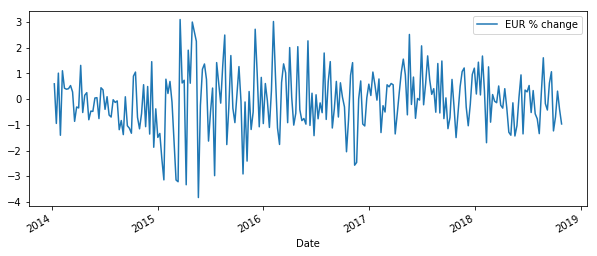

In [2]:
display(df.head()) # get a sample of the full column table 
df.plot(x='Date', y='EUR % change', figsize=(10,4))

In [3]:
print ("Num of rows: " + str(df.shape[0])) # row count
print ("Num of columns: " + str(df.shape[1])) # col count

Num of rows: 248
Num of columns: 64


In [4]:
#label EUR/USD exchange rate change percentage, if EUR appreicates >0.5%, 
#lable it as "1"; if EUR depreciates further than -0.5%, label as "-1"; the rest label as '0'. 

df['label'] = df['EUR % change']
df['label'] = df['label'].apply(lambda x: max(np.sign(x-0.5),0)*1 + max(np.sign(-0.5-x),0)*-1 + 0*(1-max(np.sign(x-0.5),0)-max(np.sign(-0.5-x),0)) )
df.head()

,Date,EUR % change,PTPS(0.02),SMAVG (5) on Close,"TE UB(20,2)","TE LB(20,2)",UBB(2),BollMA (20) on Close,LBB(2),Conv(9),Base(26),"Osc(5,15) (EUR BGN)",RSI (14) on Close (EUR BGN),%DS(5),%DSS(3),WLPR(14) (EUR BGN),BollW (EUR BGN),%B (EUR BGN),CMCI(13) (EUR BGN),plusDMI(14),minusDMI,ADX,"MACD(12,26)",Sig(9),Diff,UBB(2).1,BollMA (20) on Close.1,LBB(2).1,Moving Average(13),"KLTN UB(10,100)",KLTN MA(10),"KLTN LB(10,100)","Moving Average(6,14)",Upper STARC Band(2),Lower STARC Band(2),"Upper Band(HLCAverage,20)","Average(HLCAverage,20)","Lower Band(HLCAverage,20)",Upper Band,Lower Band,BollW (EUR BGN).1,%B (EUR BGN).1,"MACD(12,26).1",Difference,Hurst(25) (EUR BGN),STARC Bandwidth (EUR BGN),STARC%B (EUR BGN),"CCI(HLCAverage,20) (EUR BGN)",ADX ROC(5),ADX MA(5),AUD BGN Curncy,GBP BGN Curncy,CAD BGN Curncy,JPY BGN Curncy,SPX Index,CCMP Index,DJI Index,SX5E Index,UKX Index,TPX Index,CL1 COMB Comdty,XAU BGN Curncy,USGG2YR Index,USGG10YR Index,label
0,2018-10-26,-0.964044,1.1815,1.1521,1.1796,1.1398,1.1796,1.1597,1.1398,1.1575,1.1720,-0.0049,37.4427,42.7650,41.2936,-80.1556,3.4324,0.0136,-118.1180,15.2706,24.0550,20.1767,-0.0100,-0.0098,-0.0002,1.1796,1.1597,1.1398,1.1574,1.177,1.1581,1.1392,1.1559,1.1939,1.1179,1.1788,1.1599,1.1410,1.1588,1.1231,3.4324,0.0136,-0.0100,-0.0002,0.5619,0.0759,29.4599,-147.8105,-11.8912,-20.5121,1.4104,0.7795,1.3106,111.91,2658.69,7167.212,24688.31,3134.89,6939.56,1596.01,67.59,1233.53,2.8062,3.0755,-1.0
1,2018-10-19,-0.397924,1.1369,1.1590,1.1807,1.1423,1.1807,1.1615,1.1423,1.1604,1.1797,0.0001,41.4371,42.6012,38.0307,-58.5603,3.2996,0.2367,-53.9887,16.6099,22.1894,20.0105,-0.0091,-0.0098,0.0006,1.1807,1.1615,1.1423,1.1602,1.176,1.1577,1.1395,1.1596,1.1968,1.1224,1.1803,1.1615,1.1428,1.1625,1.1265,3.2996,0.2367,-0.0091,0.0006,0.6037,0.0745,38.9879,-86.7666,-19.3292,-22.6456,1.4047,0.7648,1.3104,112.55,2767.78,7449.026,25444.34,3210.82,7049.80,1692.85,69.12,1226.49,2.9038,3.1921,0.0
2,2018-10-12,0.312392,1.1351,1.1612,1.1809,1.1435,1.1809,1.1622,1.1435,1.1558,1.1858,0.0008,43.2110,38.5148,33.0081,-49.6108,3.2130,0.3336,-53.0799,17.4389,23.8992,20.4436,-0.0090,-0.0099,0.0009,1.1809,1.1622,1.1435,1.1617,1.176,1.1573,1.1385,1.1603,1.1974,1.1231,1.1810,1.1621,1.1432,1.1666,1.1300,3.2130,0.3336,-0.0090,0.0009,0.7113,0.0744,44.2838,-87.9978,-22.1292,-21.3498,1.4057,0.7603,1.3024,112.21,2767.13,7496.894,25339.99,3194.41,6995.91,1702.45,71.34,1217.05,2.8528,3.1613,0.0
3,2018-10-05,-0.689417,1.1331,1.1611,1.1812,1.1442,1.1812,1.1627,1.1442,1.1558,1.1858,-0.0002,41.3875,32.9763,27.5567,-56.6147,3.1799,0.2222,-59.6907,18.7062,24.3296,20.8140,-0.0092,-0.0102,0.0009,1.1812,1.1627,1.1442,1.1627,1.177,1.1582,1.1393,1.1610,1.1984,1.1235,1.1819,1.1630,1.1440,1.1696,1.1326,3.1799,0.2222,-0.0092,0.0009,0.8564,0.0748,38.5749,-95.6542,-23.7152,-17.8805,1.4180,0.7622,1.2939,113.72,2885.57,7788.447,26447.05,3345.51,7318.54,1792.65,74.34,1203.63,2.8850,3.2328,-1.0
4,2018-09-28,-1.234148,1.1311,1.1627,1.1828,1.1450,1.1828,1.1639,1.1450,1.1558,1.1858,0.0005,44.3243,27.5332,22.2693,-41.0505,3.2453,0.4071,41.6354,19.9462,21.6577,21.4100,-0.0090,-0.0104,0.0014,1.1828,1.1639,1.1450,1.1644,1.178,1.1595,1.1411,1.1626,1.2007,1.1245,1.1838,1.1645,1.1451,1.1715,1.1345,3.2453,0.4071,-0.0090,0.0014,0.6923,0.0763,47.1369,18.4275,-25.4954,-13.4257,1.3843,0.7674,1.2908,113.70,2913.98,8046.353,26458.31,3399.20,7510.20,1817.25,73.25,1190.88,2.8188,3.0612,-1.0


In [5]:
print(len(df[df['label'] == -1]))
print(len(df[df['label'] == 0]))
print(len(df[df['label'] == 1]))


86
84
78


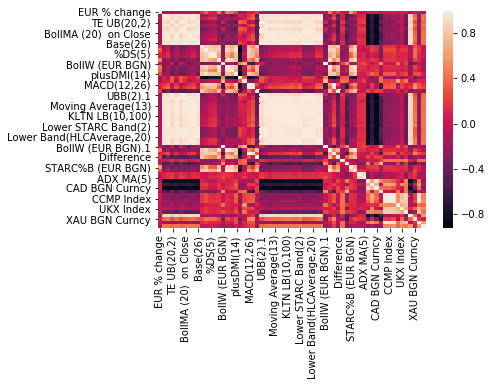

In [6]:
#get a quick view on the correlations between features; i am quie disappointed at the chart visualization 
#because it is barely readable. 

corr = df[['Date', 'EUR % change', 'PTPS(0.02)', 'SMAVG (5)  on Close',
       'TE UB(20,2)', 'TE LB(20,2)', 'UBB(2)', 'BollMA (20)  on Close',
       'LBB(2)', 'Conv(9)', 'Base(26)', 'Osc(5,15) (EUR BGN)',
    'RSI (14)  on Close (EUR BGN)', '%DS(5)',
       '%DSS(3)', 'WLPR(14) (EUR BGN)', 'BollW (EUR BGN)', '%B (EUR BGN)',
       'CMCI(13) (EUR BGN)', 'plusDMI(14)', 'minusDMI', 'ADX', 'MACD(12,26)',
       'Sig(9)', 'Diff', 'UBB(2).1', 'BollMA (20)  on Close.1', 'LBB(2).1',
       'Moving Average(13)', 'KLTN UB(10,100)', 'KLTN MA(10)',
       'KLTN LB(10,100)', 'Moving Average(6,14)', 'Upper STARC Band(2)',
       'Lower STARC Band(2)', 'Upper Band(HLCAverage,20)',
       'Average(HLCAverage,20)', 'Lower Band(HLCAverage,20)', 'Upper Band', 'Lower Band', 'BollW (EUR BGN).1',
       '%B (EUR BGN).1', 'MACD(12,26).1','Difference',
       'Hurst(25) (EUR BGN)', 'STARC Bandwidth (EUR BGN)', 'STARC%B (EUR BGN)',
       'CCI(HLCAverage,20) (EUR BGN)', 'ADX ROC(5)', 'ADX MA(5)',
       'AUD BGN Curncy', 'GBP BGN Curncy', 'CAD BGN Curncy', 'JPY BGN Curncy',
       'SPX Index', 'CCMP Index', 'DJI Index', 'SX5E Index', 'UKX Index',
       'TPX Index', 'CL1 COMB Comdty', 'XAU BGN Curncy', 'USGG2YR  Index',
       'USGG10YR Index']].corr()

sns.heatmap(corr)



In [7]:
display(corr)

,EUR % change,PTPS(0.02),SMAVG (5) on Close,"TE UB(20,2)","TE LB(20,2)",UBB(2),BollMA (20) on Close,LBB(2),Conv(9),Base(26),"Osc(5,15) (EUR BGN)",RSI (14) on Close (EUR BGN),%DS(5),%DSS(3),WLPR(14) (EUR BGN),BollW (EUR BGN),%B (EUR BGN),CMCI(13) (EUR BGN),plusDMI(14),minusDMI,ADX,"MACD(12,26)",Sig(9),Diff,UBB(2).1,BollMA (20) on Close.1,LBB(2).1,Moving Average(13),"KLTN UB(10,100)",KLTN MA(10),"KLTN LB(10,100)","Moving Average(6,14)",Upper STARC Band(2),Lower STARC Band(2),"Upper Band(HLCAverage,20)","Average(HLCAverage,20)","Lower Band(HLCAverage,20)",Upper Band,Lower Band,BollW (EUR BGN).1,%B (EUR BGN).1,"MACD(12,26).1",Difference,Hurst(25) (EUR BGN),STARC Bandwidth (EUR BGN),STARC%B (EUR BGN),"CCI(HLCAverage,20) (EUR BGN)",ADX ROC(5),ADX MA(5),AUD BGN Curncy,GBP BGN Curncy,CAD BGN Curncy,JPY BGN Curncy,SPX Index,CCMP Index,DJI Index,SX5E Index,UKX Index,TPX Index,CL1 COMB Comdty,XAU BGN Curncy,USGG2YR Index,USGG10YR Index
EUR % change,1.000000,-0.145013,-0.084902,-0.127771,-0.109627,-0.127771,-0.121917,-0.109627,-0.096372,-0.120875,0.156449,0.356392,0.116303,0.106253,0.475657,-0.008378,0.445542,0.372939,0.253971,-0.238167,-0.043492,0.112737,0.060187,0.214333,-0.127771,-0.121917,-0.109627,-0.104226,-0.112473,-0.110584,-0.108551,-0.089919,-0.093945,-0.085577,-0.126982,-0.125027,-0.122863,-0.049898,-0.055659,-0.008378,0.445542,0.112744,0.214349,0.019418,0.008375,0.629610,0.321217,-0.010391,-0.003651,0.023748,0.051589,0.057304,-0.039096,0.043531,0.046879,0.041643,0.012163,0.033026,0.053153,-0.057657,0.058482,0.019024,-0.054386
PTPS(0.02),-0.145013,1.000000,0.950692,0.920840,0.951599,0.920840,0.962471,0.951599,0.969596,0.938338,-0.201351,-0.128877,0.012710,0.066711,-0.321856,-0.226914,-0.273398,-0.368824,-0.226135,0.114818,0.080595,0.158265,0.297864,-0.492274,0.920840,0.962471,0.951599,0.967789,0.971917,0.974157,0.973688,0.956876,0.951477,0.953643,0.956200,0.960887,0.963288,0.942176,0.949333,-0.226914,-0.273398,0.158195,-0.492106,0.053156,-0.502591,-0.357753,-0.259246,0.090630,0.122709,-0.827669,-0.639712,-0.852125,-0.508973,-0.217018,-0.229060,-0.153622,-0.170643,-0.015001,-0.372467,0.863301,0.374691,-0.174044,0.425151
SMAVG (5) on Close,-0.084902,0.950692,1.000000,0.896575,0.967319,0.896575,0.958317,0.967319,0.991696,0.941343,0.010216,0.040408,0.147964,0.177930,-0.102803,-0.308215,-0.056885,-0.137172,-0.087601,-0.042290,0.056974,0.268375,0.357983,-0.288027,0.896575,0.958317,0.967319,0.988651,0.987221,0.990361,0.990703,0.999442,0.994113,0.995796,0.949626,0.954812,0.957696,0.992268,0.992577,-0.308215,-0.056885,0.268295,-0.287836,0.031541,-0.522350,-0.195436,-0.037237,0.156411,0.166623,-0.873591,-0.659089,-0.890455,-0.575360,-0.220664,-0.231508,-0.150205,-0.184997,-0.003848,-0.392752,0.900598,0.463097,-0.182364,0.443180
"TE UB(20,2)",-0.127771,0.920840,0.896575,1.000000,0.893115,1.000000,0.972267,0.893115,0.926130,0.968681,-0.367418,-0.303716,-0.185434,-0.150956,-0.357468,0.062089,-0.323592,-0.350054,-0.417125,0.333025,0.286346,-0.118739,0.015361,-0.518601,1.000000,0.972267,0.893115,0.945392,0.943057,0.934476,0.923880,0.903683,0.915849,0.885236,0.975959,0.974002,0.970068,0.891899,0.894360,0.062089,-0.323592,-0.118814,-0.518451,0.184256,-0.326727,-0.346910,-0.308031,0.186056,0.220712,-0.848493,-0.704181,-0.894125,-0.358796,-0.265422,-0.278676,-0.204591,-0.085970,-0.014943,-0.358213,0.842877,0.284770,-0.238463,0.381109
"TE LB(20,2)",-0.109627,0.951599,0.967319,0.893115,1.000000,0.893115,0.973549,1.000000,0.978680,0.959977,-0.156685,-0.119653,-0.028008,0.011771,-0.255842,-0.392637,-0.216473,-0.266549,-0.230933,0.073578,-0.062457,0.153368,0.277521,-0.435954,0.893115,0.973549,1.000000,0.980442,0.974938,0.979744,0.981697,0.970713,0.962129,0.970213,0.966996,0.971678,0.974051,0.959354,0.965605,-0.392637,-0.216473,0.153282,-0.435767,0.049752,-0.536517,-0.285060,-0.198327,0.079751,0.071421,-0.842477,-0.650662,-0.859844,-0.577426,-0.259736,-0.269916,-0.193659,-0.260643,-0.045694,-0.448269,0.920295,0.405214,-0.198724,0.432435
UBB(2),-0.12777

In [8]:
y = df['label']
to_drop=['EUR % change','label','Date']
features = df.drop(to_drop, axis=1)
X=features
X.head()

,PTPS(0.02),SMAVG (5) on Close,"TE UB(20,2)","TE LB(20,2)",UBB(2),BollMA (20) on Close,LBB(2),Conv(9),Base(26),"Osc(5,15) (EUR BGN)",RSI (14) on Close (EUR BGN),%DS(5),%DSS(3),WLPR(14) (EUR BGN),BollW (EUR BGN),%B (EUR BGN),CMCI(13) (EUR BGN),plusDMI(14),minusDMI,ADX,"MACD(12,26)",Sig(9),Diff,UBB(2).1,BollMA (20) on Close.1,LBB(2).1,Moving Average(13),"KLTN UB(10,100)",KLTN MA(10),"KLTN LB(10,100)","Moving Average(6,14)",Upper STARC Band(2),Lower STARC Band(2),"Upper Band(HLCAverage,20)","Average(HLCAverage,20)","Lower Band(HLCAverage,20)",Upper Band,Lower Band,BollW (EUR BGN).1,%B (EUR BGN).1,"MACD(12,26).1",Difference,Hurst(25) (EUR BGN),STARC Bandwidth (EUR BGN),STARC%B (EUR BGN),"CCI(HLCAverage,20) (EUR BGN)",ADX ROC(5),ADX MA(5),AUD BGN Curncy,GBP BGN Curncy,CAD BGN Curncy,JPY BGN Curncy,SPX Index,CCMP Index,DJI Index,SX5E Index,UKX Index,TPX Index,CL1 COMB Comdty,XAU BGN Curncy,USGG2YR Index,USGG10YR Index
0,1.1815,1.1521,1.1796,1.1398,1.1796,1.1597,1.1398,1.1575,1.1720,-0.0049,37.4427,42.7650,41.2936,-80.1556,3.4324,0.0136,-118.1180,15.2706,24.0550,20.1767,-0.0100,-0.0098,-0.0002,1.1796,1.1597,1.1398,1.1574,1.177,1.1581,1.1392,1.1559,1.1939,1.1179,1.1788,1.1599,1.1410,1.1588,1.1231,3.4324,0.0136,-0.0100,-0.0002,0.5619,0.0759,29.4599,-147.8105,-11.8912,-20.5121,1.4104,0.7795,1.3106,111.91,2658.69,7167.212,24688.31,3134.89,6939.56,1596.01,67.59,1233.53,2.8062,3.0755
1,1.1369,1.1590,1.1807,1.1423,1.1807,1.1615,1.1423,1.1604,1.1797,0.0001,41.4371,42.6012,38.0307,-58.5603,3.2996,0.2367,-53.9887,16.6099,22.1894,20.0105,-0.0091,-0.0098,0.0006,1.1807,1.1615,1.1423,1.1602,1.176,1.1577,1.1395,1.1596,1.1968,1.1224,1.1803,1.1615,1.1428,1.1625,1.1265,3.2996,0.2367,-0.0091,0.0006,0.6037,0.0745,38.9879,-86.7666,-19.3292,-22.6456,1.4047,0.7648,1.3104,112.55,2767.78,7449.026,25444.34,3210.82,7049.80,1692.85,69.12,1226.49,2.9038,3.1921
2,1.1351,1.1612,1.1809,1.1435,1.1809,1.1622,1.1435,1.1558,1.1858,0.0008,43.2110,38.5148,33.0081,-49.6108,3.2130,0.3336,-53.0799,17.4389,23.8992,20.4436,-0.0090,-0.0099,0.0009,1.1809,1.1622,1.1435,1.1617,1.176,1.1573,1.1385,1.1603,1.1974,1.1231,1.1810,1.1621,1.1432,1.1666,1.1300,3.2130,0.3336,-0.0090,0.0009,0.7113,0.0744,44.2838,-87.9978,-22.1292,-21.3498,1.4057,0.7603,1.3024,112.21,2767.13,7496.894,25339.99,3194.41,6995.91,1702.45,71.34,1217.05,2.8528,3.1613
3,1.1331,1.1611,1.1812,1.1442,1.1812,1.1627,1.1442,1.1558,1.1858,-0.0002,41.3875,32.9763,27.5567,-56.6147,3.1799,0.2222,-59.6907,18.7062,24.3296,20.8140,-0.0092,-0.0102,0.0009,1.1812,1.1627,1.1442,1.1627,1.177,1.1582,1.1393,1.1610,1.1984,1.1235,1.1819,1.1630,1.1440,1.1696,1.1326,3.1799,0.2222,-0.0092,0.0009,0.8564,0.0748,38.5749,-95.6542,-23.7152,-17.8805,1.4180,0.7622,1.2939,113.72,2885.57,7788.447,26447.05,3345.51,7318.54,1792.65,74.34,1203.63,2.8850,3.2328
4,1.1311,1.1627,1.1828,1.1450,1.1828,1.1639,1.1450,1.1558,1.1858,0.0005,44.3243,27.5332,22.2693,-41.0505,3.2453,0.4071,41.6354,19.9462,21.6577,21.4100,-0.0090,-0.0104,0.0014,1.1828,1.1639,1.1450,1.1644,1.178,1.1595,1.1411,1.1626,1.2007,1.1245,1.1838,1.1645,1.1451,1.1715,1.1345,3.2453,0.4071,-0.0090,0.0014,0.6923,0.0763,47.1369,18.4275,-25.4954,-13.4257,1.3843,0.7674,1.2908,113.70,2913.98,8046.353,26458.31,3399.20,7510.20,1817.25,73.25,1190.88,2.8188,3.0612


In [9]:
# Scale the data and standardize features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(df['label']))

Feature space holds 248 observations and 62 features
Unique target labels: [-1.  0.  1.]


In [10]:
X # check whether features are standardized. 

array([[ 0.05467971, -0.23210631, -0.45906545, ..., -0.12617846,
         2.355509  ,  1.89676801],
       [-0.39002712, -0.1589419 , -0.4478944 , ..., -0.22685092,
         2.49172377,  2.18918568],
       [-0.40797493, -0.13561412, -0.4458633 , ..., -0.36184352,
         2.42054597,  2.11194328],
       ...,
       [ 1.6380753 ,  2.02008513,  1.61468762, ...,  0.39620289,
        -1.09270638,  0.99268078],
       [ 1.61813329,  2.01902478,  1.64413857, ...,  0.16725886,
        -1.04288192,  1.25450243],
       [ 1.59719418,  2.06249928,  1.66241847, ...,  0.0878935 ,
        -1.04469625,  1.35105544]])

From this part below, we will be using three machine learning methods to analyze: random forest,logistic regression, and KneighborClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()
classifier_GBC = GradientBoostingClassifier()


In [12]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 198 observation with 62 features
test data has 50 observation with 62 features


In [13]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [14]:
parameters = {
    'n_estimators' : [80,200,100]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [80, 200, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print_grid_search_metrics(Grid_RF)

Best score: 0.480
Best parameters set:
	n_estimators: 100


In [16]:
best_RF_model = Grid_RF.best_estimator_

In [17]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
print_grid_search_metrics(Grid_LR)

Best score: 0.712
Best parameters set:
	C: 10
	penalty: 'l1'


In [19]:
best_LR_model = Grid_LR.best_estimator_

In [20]:
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [21]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.419
Best parameters set:
	n_neighbors: 10


In [22]:
best_KNN_model = Grid_KNN.best_estimator_

In [23]:
parameters = {
    'learning_rate':[0.1,0.01,0.5,0.3], 
     'n_estimators':[100,1000,5000]
}
Grid_GBC = GridSearchCV(GradientBoostingClassifier(),parameters, cv=5)
Grid_GBC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 0.5, 0.3], 'n_estimators': [100, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
print_grid_search_metrics(Grid_GBC)

Best score: 0.510
Best parameters set:
	learning_rate: 0.01
	n_estimators: 100


In [25]:
best_GBC_model = Grid_GBC.best_estimator_

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


classifier_logistic = LogisticRegression(C=5,penalty='l2')
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_RF = RandomForestClassifier(n_estimators=1000,max_depth=2)
classifier_GBC=GradientBoostingClassifier(learning_rate=0.5,n_estimators=100)

In [27]:
model_names = ['Random Forest','KNeighbors','LogisticRegression','Gradient Boosting']
model_list =[classifier_RF,classifier_KNN,classifier_RF,classifier_GBC]

count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Random Forest is: 0.523
Model accuracy of KNeighbors is: 0.340
Model accuracy of LogisticRegression is: 0.518
Model accuracy of Gradient Boosting is: 0.521


In [28]:
best_RF_model = Grid_RF.best_estimator_


In [29]:
model_names = ['Random Forest','KNeighbors','LogisticRegression','Gradient Boosting']
model_list =[classifier_RF,classifier_KNN,classifier_RF,classifier_GBC]

count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Random Forest is: 0.508
Model accuracy of KNeighbors is: 0.340
Model accuracy of LogisticRegression is: 0.513
Model accuracy of Gradient Boosting is: 0.516


In [30]:
model_names = ['Gradient Boosting']
model_list =[classifier_GBC]

count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Gradient Boosting is: 0.501


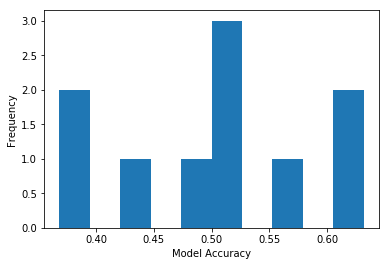

In [31]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(cv_score)
plt.xlabel("Model Accuracy")
plt.ylabel("Frequency")

fig = plt.gcf()

In [32]:
#confidence interval at 95% for accuracy
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = cv_score

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

end = m + h
print (end)

0.43459243164017225
0.5674125808911562


As we would select Random Forest as compared to other two methods, we only evaluate the model below. 


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    print(cm)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    #print (classifier)
    #print ("Accuracy is: %0.3f" % accuracy)
    #print ("precision is: %0.3f" % precision)
    #print ("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['-1','0','1']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[[11  2  4]
 [ 4  9  6]
 [ 2  2 10]]


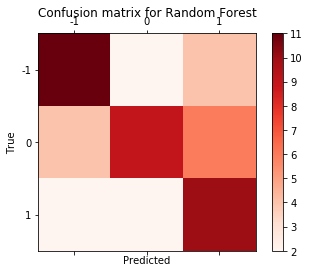

[[16  1  0]
 [ 6  6  7]
 [ 1  1 12]]


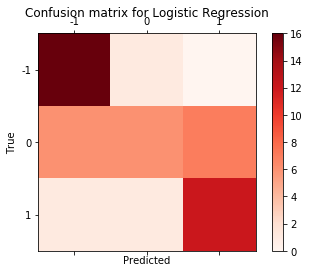

[[9 3 5]
 [3 8 8]
 [3 6 5]]


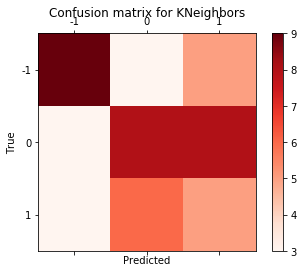

[[11  4  2]
 [ 7  6  6]
 [ 1  2 11]]


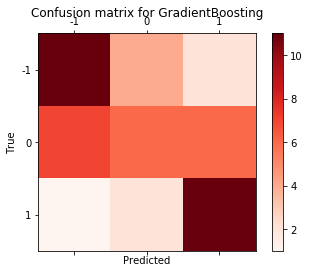

In [34]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("KNeighbors", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
    ("GradientBoosting", confusion_matrix(y_test,best_GBC_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

In [35]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), features.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
WLPR(14) (EUR BGN): 0.0628
STARC%B (EUR BGN): 0.0618
%B (EUR BGN): 0.0392
%B (EUR BGN).1: 0.0371
STARC Bandwidth (EUR BGN): 0.0317
TPX Index: 0.0271
MACD(12,26).1: 0.0263
%DSS(3): 0.0255
XAU BGN Curncy: 0.0225
ADX: 0.0224
KLTN UB(10,100): 0.021
DJI Index: 0.0201
MACD(12,26): 0.0186
Diff: 0.0182
BollMA (20)  on Close.1: 0.0181
SX5E Index: 0.0178
Lower STARC Band(2): 0.0178
CCI(HLCAverage,20) (EUR BGN): 0.0175
USGG10YR Index: 0.0172
Lower Band(HLCAverage,20): 0.0172
Hurst(25) (EUR BGN): 0.017
PTPS(0.02): 0.0168
LBB(2): 0.0165
JPY BGN Curncy: 0.0165
CAD BGN Curncy: 0.016
USGG2YR  Index: 0.0157
SMAVG (5)  on Close: 0.0152
CCMP Index: 0.0149
SPX Index: 0.0141
Moving Average(13): 0.0135
UBB(2): 0.0134
plusDMI(14): 0.0131
UKX Index: 0.0128
CMCI(13) (EUR BGN): 0.0127
ADX MA(5): 0.0122
RSI (14)  on Close (EUR BGN): 0.0121
BollW (EUR BGN): 0.012
Upper STARC Band(2): 0.0119
Upper Band: 0.0118
minusDMI: 0.0115
KLTN MA(10): 0.0112
Average(HLCAverag

In [36]:
list1=[]
list2=[]
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), features.columns), reverse=True):
    list1.append(v)
    list2.append(k)
    print (v + ": " + str(k))


WLPR(14) (EUR BGN): 0.0628
STARC%B (EUR BGN): 0.0618
%B (EUR BGN): 0.0392
%B (EUR BGN).1: 0.0371
STARC Bandwidth (EUR BGN): 0.0317
TPX Index: 0.0271
MACD(12,26).1: 0.0263
%DSS(3): 0.0255
XAU BGN Curncy: 0.0225
ADX: 0.0224
KLTN UB(10,100): 0.021
DJI Index: 0.0201
MACD(12,26): 0.0186
Diff: 0.0182
BollMA (20)  on Close.1: 0.0181
SX5E Index: 0.0178
Lower STARC Band(2): 0.0178
CCI(HLCAverage,20) (EUR BGN): 0.0175
USGG10YR Index: 0.0172
Lower Band(HLCAverage,20): 0.0172
Hurst(25) (EUR BGN): 0.017
PTPS(0.02): 0.0168
LBB(2): 0.0165
JPY BGN Curncy: 0.0165
CAD BGN Curncy: 0.016
USGG2YR  Index: 0.0157
SMAVG (5)  on Close: 0.0152
CCMP Index: 0.0149
SPX Index: 0.0141
Moving Average(13): 0.0135
UBB(2): 0.0134
plusDMI(14): 0.0131
UKX Index: 0.0128
CMCI(13) (EUR BGN): 0.0127
ADX MA(5): 0.0122
RSI (14)  on Close (EUR BGN): 0.0121
BollW (EUR BGN): 0.012
Upper STARC Band(2): 0.0119
Upper Band: 0.0118
minusDMI: 0.0115
KLTN MA(10): 0.0112
Average(HLCAverage,20): 0.0111
Osc(5,15) (EUR BGN): 0.0106
UBB(2).1:

In [37]:
data=pd.DataFrame(list2,list1)

In [38]:
data.head(10)

,0
WLPR(14) (EUR BGN),0.0628
STARC%B (EUR BGN),0.0618
%B (EUR BGN),0.0392
%B (EUR BGN).1,0.0371
STARC Bandwidth (EUR BGN),0.0317
TPX Index,0.0271
"MACD(12,26).1",0.0263
%DSS(3),0.0255
XAU BGN Curncy,0.0225
ADX,0.0224


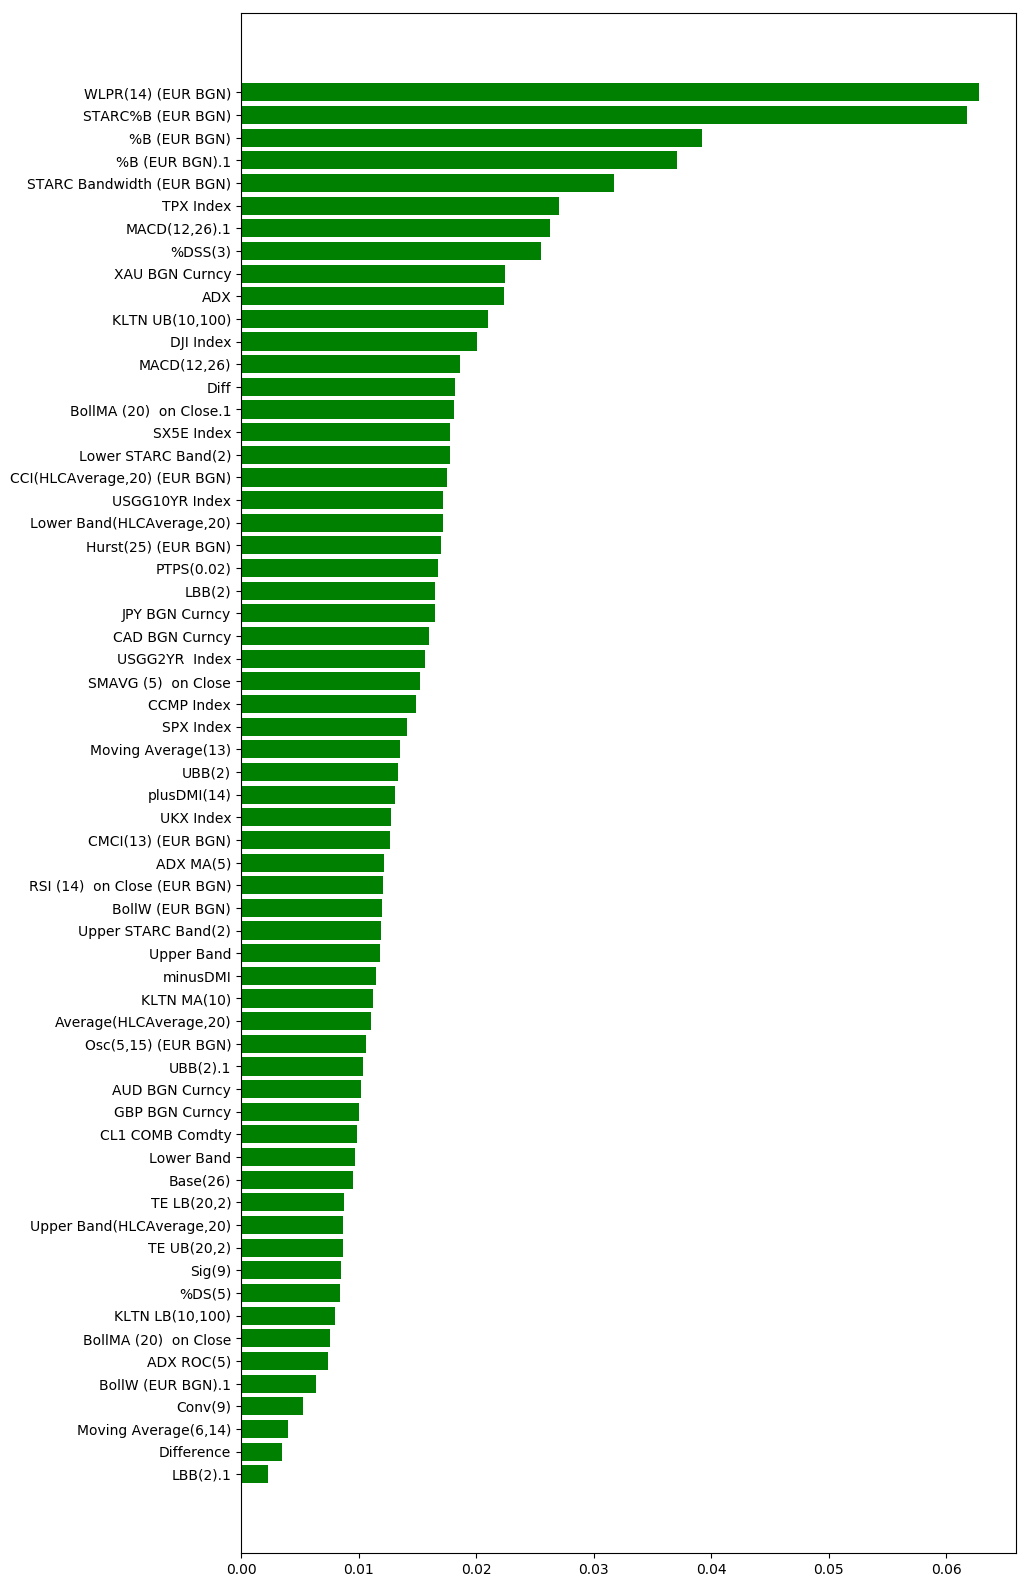

In [39]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10, 20))

# Example data
people = data.index
y_pos = np.arange(len(people))
performance = np.array(data[0][:])

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()